<a href="https://colab.research.google.com/github/meoowqt/pythonDataLab/blob/main/LW6_regression_Vechkanova_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа #6: Регрессия

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

###Задание 1
1.1 Загрузить в pandas любой набор данных, подходящих для регрессии

In [ ]:
df = pd.read_excel("1.xls")
df = df.dropna()
df.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


1.2 Визуализировать heatmap-матрицу кореллированности вещественных признаков

<ipython-input-57-234746002c36>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="PuBu", square=True, cbar=True)


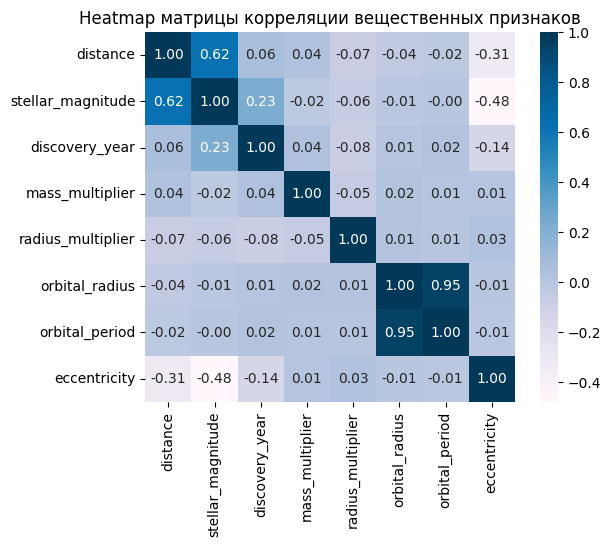

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="PuBu", square=True, cbar=True)
plt.title('Heatmap матрицы корреляции вещественных признаков')
plt.show()

1.3 Визуализировать взаимосвязь между target-переменной и каждым из признаком (с помощью `srs.pairplot` или `pd.plotting.scatter_matrix` или любым другим способом)

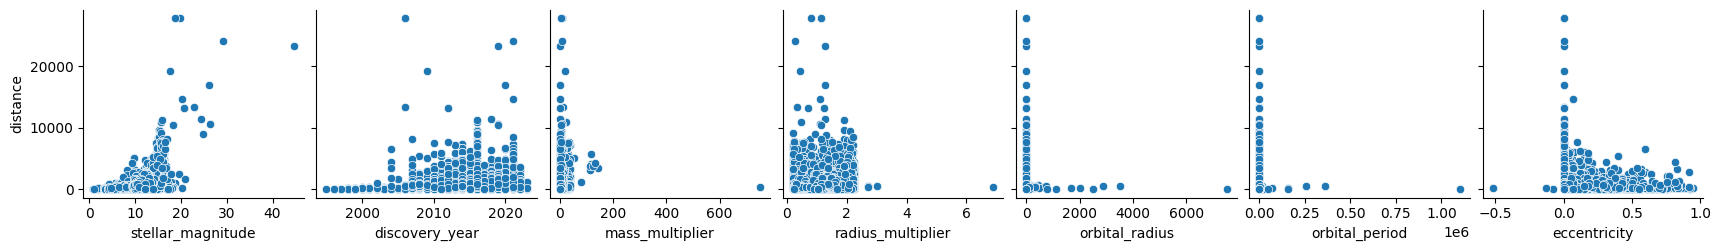

In [ ]:
num_col = df.select_dtypes(include='number').columns.tolist()
num_col.remove("distance")
sns.pairplot(df, x_vars=num_col, y_vars=['distance'], diag_kind='kde', kind='scatter')
plt.show()

1.4 Разделить датасет на обучающую и тестовую выборки в соотношении 7:3

In [ ]:
from sklearn.model_selection import train_test_split
num_df = df[num_col]
x_train, x_test, y_train, y_test = train_test_split(num_df, df["distance"] , test_size=0.3)

###Задание 2
2.1 Обучить модель линейной регрессии `LinearRegression` на обучающем наборе

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

2.2 Для обученной модели вывести `model.coef_` и `model.intercept_`

In [ ]:
coeff = pd.DataFrame({'Столбец': x_train.columns, 'model.coef_': model.coef_})
print(coeff, "\n")
print("model.intercept_:", model.intercept_)

             Столбец  model.coef_
0  stellar_magnitude   380.203564
1     discovery_year   -41.745178
2    mass_multiplier    19.959003
3  radius_multiplier   -53.059770
4     orbital_radius    -1.023873
5     orbital_period     0.002255
6       eccentricity  -284.584522 

model.intercept_: 81062.66043470302


2.3 Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборах

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MAE на обучающем наборе:", mae_train)
print("MSE на обучающем наборе:", mse_train)
print("R2 на обучающем наборе:", r2_train)
print()
print("MAE на тестовом наборе:", mae_test)
print("MSE на тестовом наборе:", mse_test)
print("R2 на тестовом наборе:", r2_test)

MAE на обучающем наборе: 950.6391493950542
MSE на обучающем наборе: 2152896.767925878
R2 на обучающем наборе: 0.40329636760361276

MAE на тестовом наборе: 936.6652971235426
MSE на тестовом наборе: 1701496.8582345445
R2 на тестовом наборе: 0.32880819128045713


2.4 Построить график `barh` с важностью коэфициентов при соответствующих признаках (важность коэффициента - это `abs(model.coef_)`). Отсортировать коэффициенты на графике по убыванию

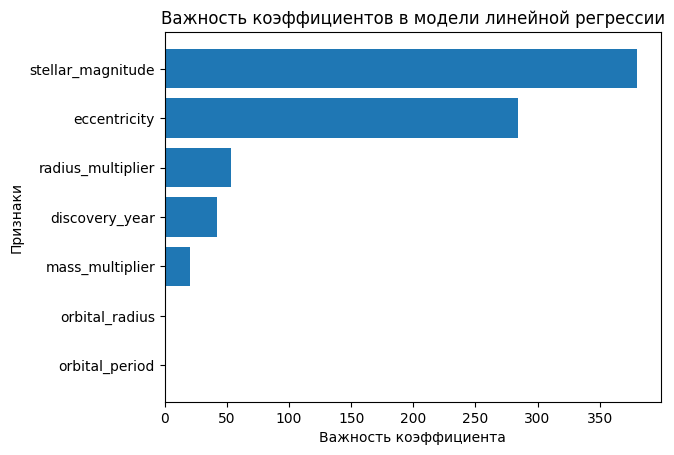

In [ ]:
importance = np.abs(model.coef_)
coeff = pd.DataFrame({'Столбцы': x_train.columns, 'Важность коэффициента': importance})

coeff = coeff.sort_values(by='Важность коэффициента', ascending=True)

plt.barh(coeff['Столбцы'], coeff['Важность коэффициента'])
plt.xlabel('Важность коэффициента')
plt.ylabel('Признаки')
plt.title('Важность коэффициентов в модели линейной регрессии')
plt.show()

2.5 Обучить модель регрессии `ElasticNet`, с помощью `GridSearchCV` найти наилучший параметры `alpha` и `l1_ratio` (в пределах 0:1). Выбрать лучшую модель

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9]
}

elastic_net = ElasticNet()

grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Наилучшие параметры:", best_params)
print("Наилучшая модель:", best_model)

Наилучшие параметры: {'alpha': 0.5, 'l1_ratio': 0.1}
Наилучшая модель: ElasticNet(alpha=0.5, l1_ratio=0.1)


2.6-2.8 Повторить пункты 2.2-2.4 для полученной в 2.5 модели

In [ ]:
coeff = pd.DataFrame({'Столбец': x_train.columns, 'model.coef_': best_model.coef_})
print(coeff, "\n")
print("model.intercept_:", model.intercept_)

             Столбец  model.coef_
0  stellar_magnitude   368.235986
1     discovery_year   -37.570317
2    mass_multiplier    20.001622
3  radius_multiplier   -24.166857
4     orbital_radius    -1.114048
5     orbital_period     0.003402
6       eccentricity   -17.204572 

model.intercept_: 81062.66043470302


In [ ]:
y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MAE на обучающем наборе:", mae_train)
print("MSE на обучающем наборе:", mse_train)
print("R2 на обучающем наборе:", r2_train)
print()
print("MAE на тестовом наборе:", mae_test)
print("MSE на тестовом наборе:", mse_test)
print("R2 на тестовом наборе:", r2_test)

MAE на обучающем наборе: 944.6265707387286
MSE на обучающем наборе: 2157349.921619668
R2 на обучающем наборе: 0.4020621175344542

MAE на тестовом наборе: 927.1115680099283
MSE на тестовом наборе: 1688913.0371449203
R2 на тестовом наборе: 0.3337721485142727


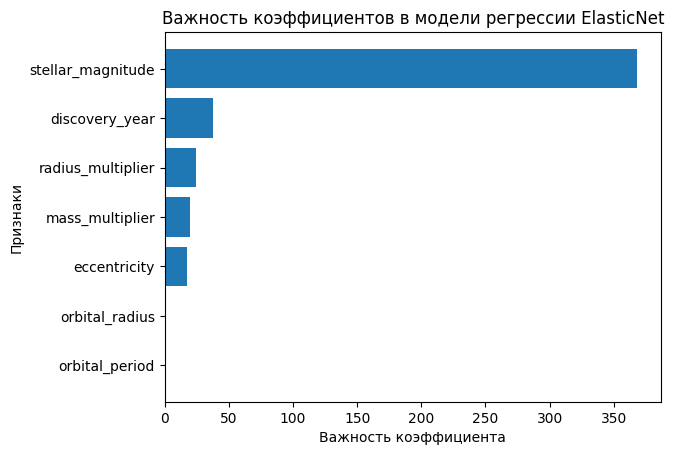

In [ ]:
importance = np.abs(best_model.coef_)
coeff = pd.DataFrame({'Столбцы': x_train.columns, 'Важность коэффициента': importance})

coeff = coeff.sort_values(by='Важность коэффициента', ascending=True)

plt.barh(coeff['Столбцы'], coeff['Важность коэффициента'])
plt.xlabel('Важность коэффициента')
plt.ylabel('Признаки')
plt.title('Важность коэффициентов в модели регрессии ElasticNet')
plt.show()